In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats
mpl.rcParams['figure.dpi'] = 150
sns.set()

In [2]:
milk = pd.read_csv("AllMilkingsDaily_Weather.csv")
milk["Timestamp"] = pd.to_datetime(milk["Timestamp"])
milk = milk.set_index("Timestamp")

milk = milk[milk["FarmName_Pseudo"].isin(["ad0a39f5", "752efd72", "5c06d92d", "540275a1", "a624fb9a", "f454e660", "ab18b151"])]

In [3]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}
    
milk = milk.replace({"FarmName_Pseudo": rDict})

farmNames = milk["FarmName_Pseudo"].unique()
farmNames = sorted(farmNames)

In [4]:
milk = milk

In [5]:
summermilk = milk[milk.index.month.isin([6,7,8])]

In [6]:
colors = ["#CE0037", "#00b0b9", "#FFB81C", "#509E2F", "#672146", "#007681", "#996017", "#79863C"]
customPalette = sns.set_palette(sns.color_palette(colors))

For farm Farm 1 the correlation between Temperature and daily yield is:
-0.035034755206480986 for the whole year and -0.035034755206480986 for the summer


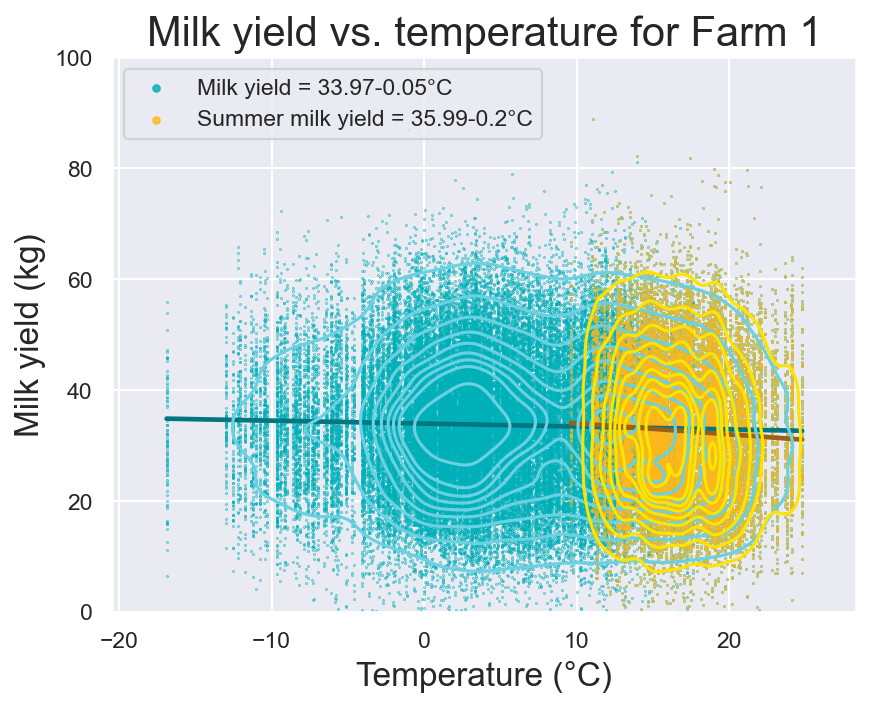

For farm Farm 2 the correlation between Temperature and daily yield is:
-0.1010182598828616 for the whole year and -0.1010182598828616 for the summer


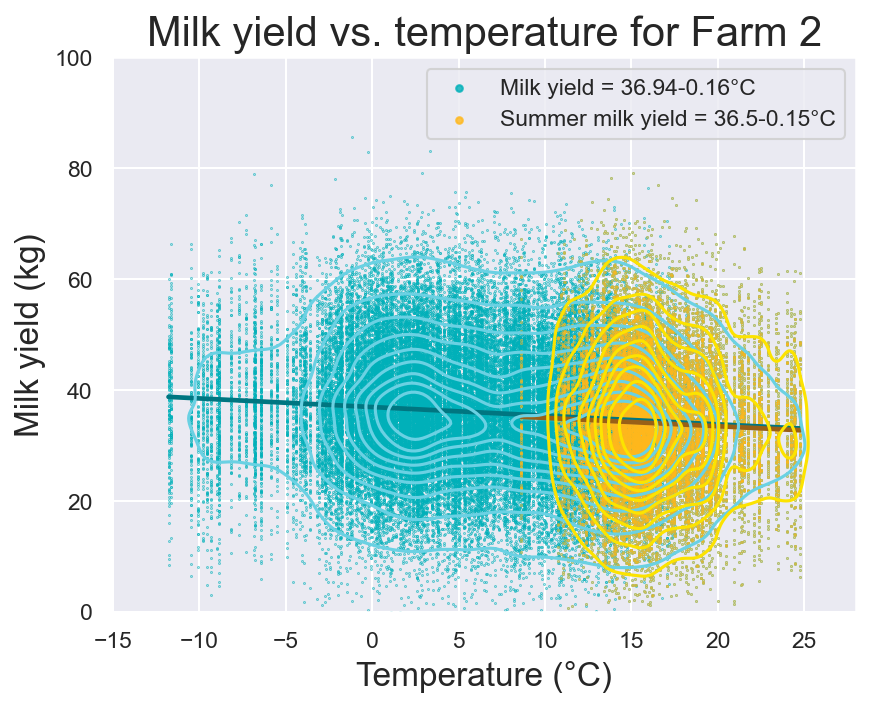

For farm Farm 3 the correlation between Temperature and daily yield is:
-0.01781662663925023 for the whole year and -0.01781662663925023 for the summer


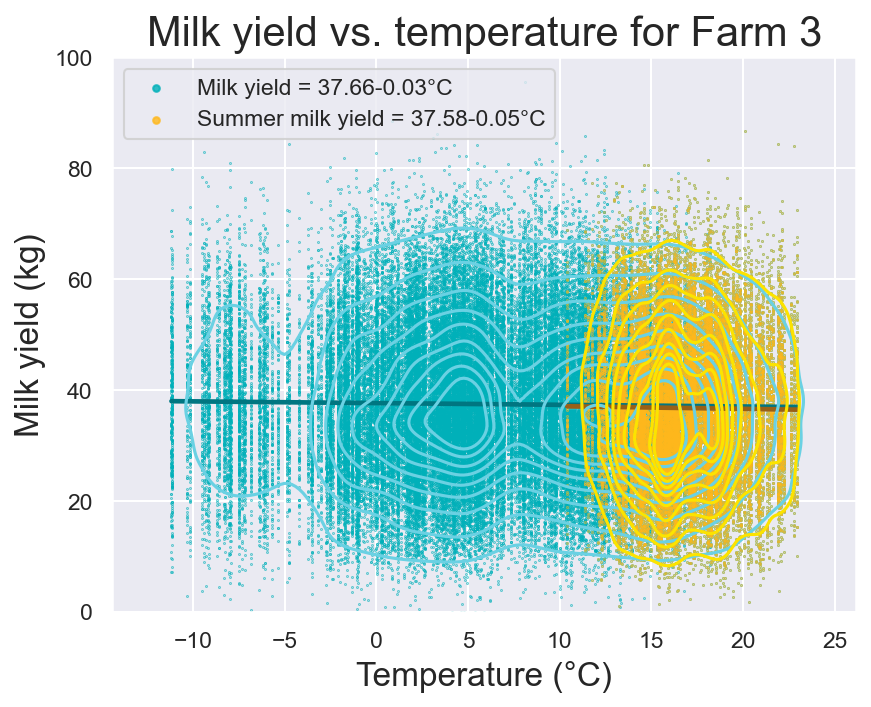

For farm Farm 5 the correlation between Temperature and daily yield is:
0.012733321648997114 for the whole year and 0.012733321648997114 for the summer


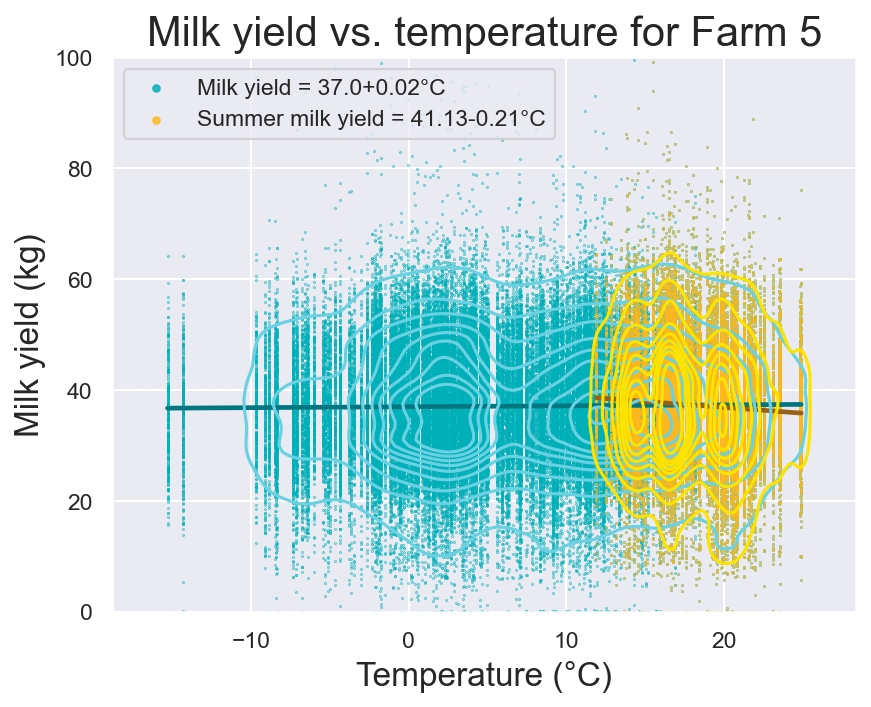

For farm Farm 7 the correlation between Temperature and daily yield is:
-0.01025434020838843 for the whole year and -0.01025434020838843 for the summer


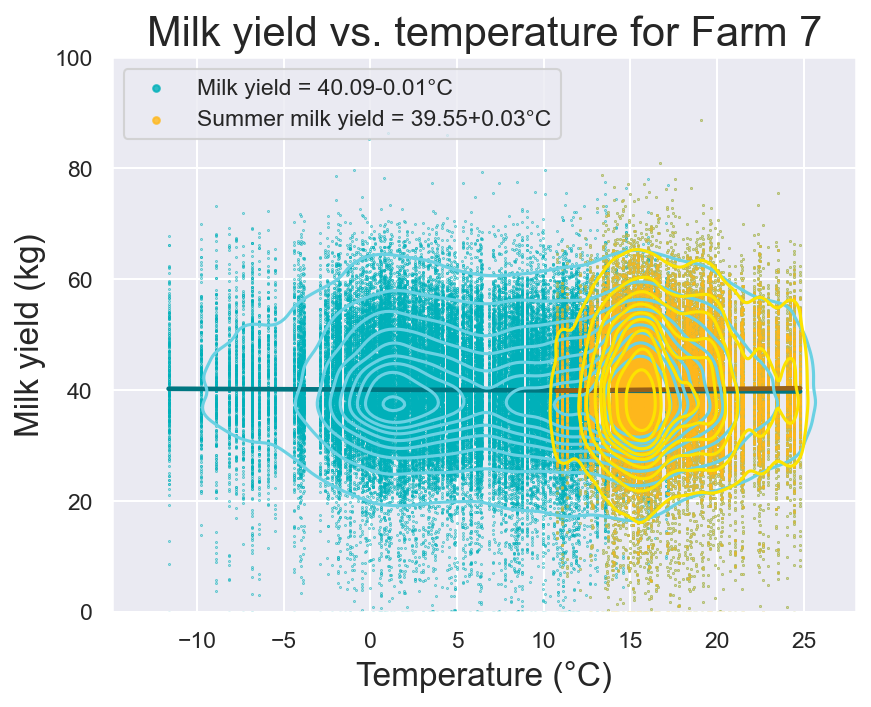

For farm Farm 8 the correlation between Temperature and daily yield is:
-0.109847013196605 for the whole year and -0.109847013196605 for the summer


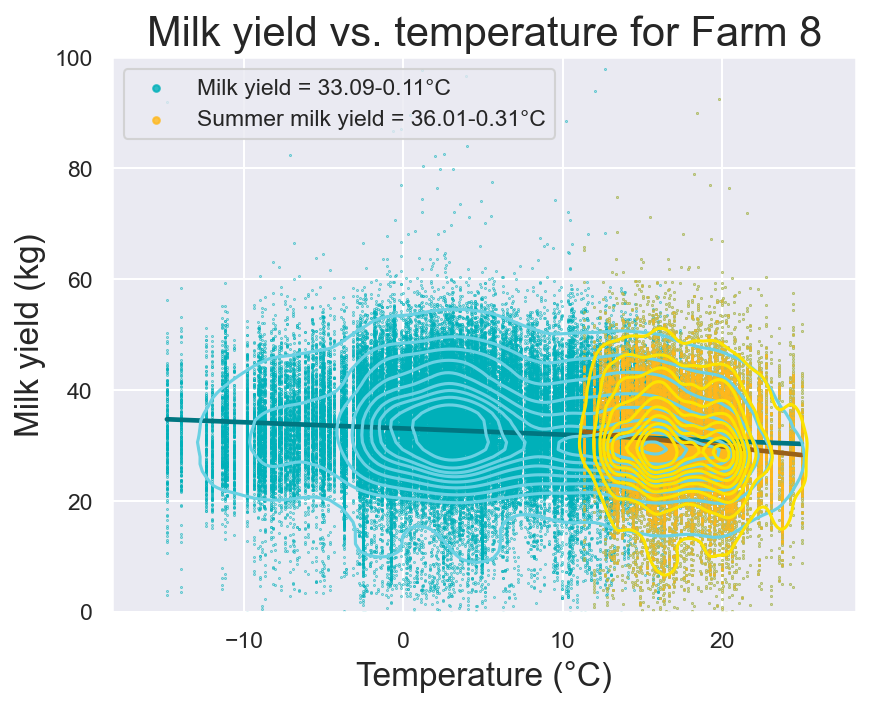

For farm Farm 9 the correlation between Temperature and daily yield is:
-0.013550607291365549 for the whole year and -0.013550607291365549 for the summer


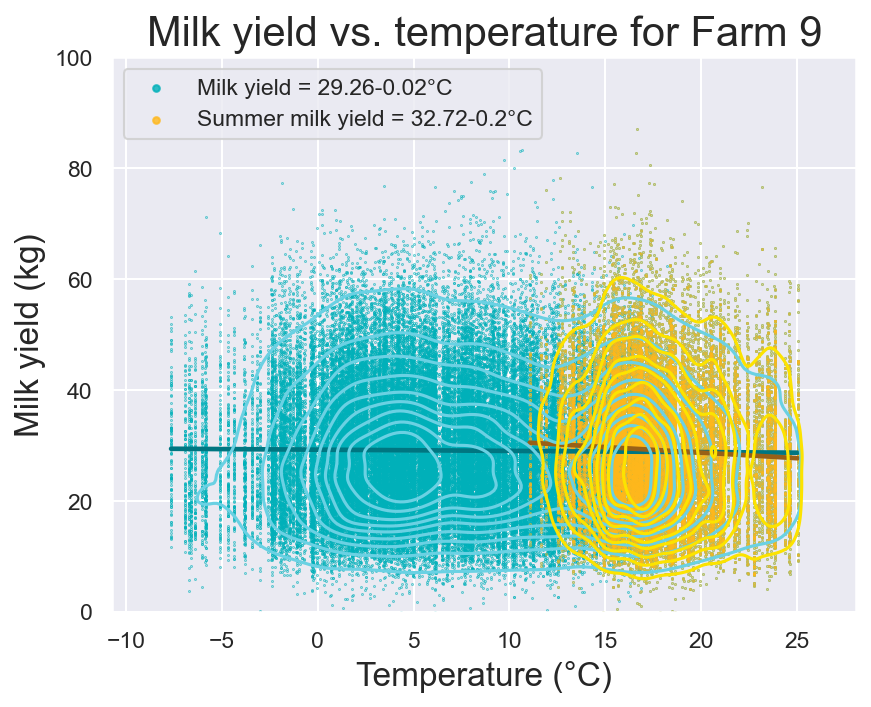

In [7]:
for name in farmNames:


    o = 1
    farm = milk[milk["FarmName_Pseudo"] == name]
    summerFarm = summermilk[summermilk["FarmName_Pseudo"] == name]
    slope, intercept, r_value, p_value, std_err = stats.linregress(farm['T_C_mean'], farm['DailyYield'])
    sSlope, sIntercept, sR_value, sP_value, sStd_err = stats.linregress(summerFarm['T_C_mean'], summerFarm['DailyYield'])

    pCorr = farm["T_C_mean"].corr(farm["DailyYield"])
    pSCorr = farm["T_C_mean"].corr(farm["DailyYield"])

    print(f"For farm {name} the correlation between Temperature and daily yield is:")
    print(f"{pCorr} for the whole year and {pSCorr} for the summer")


    if slope > 0:
        lab = f"Milk yield = {round(intercept, 2)}+{round(slope, 2)}\N{DEGREE SIGN}C"
    else:
        lab = f"Milk yield = {round(intercept, 2)}-{round(abs(slope), 2)}\N{DEGREE SIGN}C"

    if sSlope > 0:
        sLab = f"Summer milk yield = {round(sIntercept, 2)}+{round(sSlope, 2)}\N{DEGREE SIGN}C"
    else:
        sLab = f"Summer milk yield = {round(sIntercept, 2)}-{round(abs(sSlope), 2)}\N{DEGREE SIGN}C"


    sns.regplot(x = farm["T_C_mean"], y = farm["DailyYield"], color = "#00b0b9", order = o, line_kws={"color": "#007681"}, label = lab, scatter_kws={'s': 0.1}).set(title = name)
    sns.regplot(x = summerFarm["T_C_mean"], y = summerFarm["DailyYield"], color = "#ffb81c", order = o, line_kws={"color": "#996017"}, label = sLab, scatter_kws={'s': 0.1})
    sns.kdeplot(x = farm["T_C_mean"], y = farm["DailyYield"], color = "#6ad1e3")
    sns.kdeplot(x = summerFarm["T_C_mean"], y = summerFarm["DailyYield"], color = "#fce300")
    plt.xlabel("Temperature (\N{DEGREE SIGN}C)", fontsize = 16)
    plt.ylabel("Milk yield (kg)", fontsize = 16)
    plt.title(f"Milk yield vs. temperature for {name}", fontsize = 20)


    ax = plt.gca()
    ax.set_ylim([0, 100])
    plt.legend(markerscale=10)

    plt.show()